# Solar radiation Prediction

### Contribution

**Mohammed Ali**:
 - *Exploratory Data analysis*
- *Machine Learning models and tunninig*
 
   
   
**Omar Kotb**:
- *Exploratory Data analysis*
- *Data visualization and analysis*
  
  
**Ahmed Abdelhameed**:
- *Data cleaning and preprocessing*
- *Selection of significant features*


**Sinder Leidland**:
- *Data visualization and analysis*
- *Selection of significant features*  
    
    
**Daniel Fylling**:
- *Exploratory Data analysis*
- *Feature Engineering*



## Research questions

From the given dataset, can we train a machine learning algorithm to predict solar radiation for a specified day?
How do different ML algorithms compare to each other and to baseline / linear regression models?
How can data cleaning and feature engineering improve the performance of the prediction model?
What does hyperparameter tuning mean and how can it benefit the machine learning process?


In [661]:
#importing all required libraries

import pandas as pd 
import sklearn
import missingno
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# outliers removal
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import re

#for spliting test and train data
from sklearn.model_selection import train_test_split   

#for scaling
from sklearn.preprocessing import MinMaxScaler   
from sklearn.preprocessing import StandardScaler

# ML libraries
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import neighbors

# error calculation
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from math import sqrt

# fetures importance 
from sklearn.inspection import permutation_importance

# Hyperparameters tunning 
from sklearn.model_selection import GridSearchCV
plt.style.use('seaborn-white')

## Read datasets

 <li>The data set is downloaded from the provided Kaggle Link: https://www.kaggle.com/dronio/SolarEnergy  


<li>The variables are extracted from common separated values(csv)files.
    
<li>The script then displays the different variables. The data sets contain a number of different measurements. The data set includes UNIXTime, Data, Time, Radiation, Temperature, Pressure, Humidity, WindDirection(Degrees), Speed, TimeSunRise and TimeSunSet. 

 
<li>The size of the data is also shown to have an idea how big the file is. </li>


In [662]:
Dataset = pd.read_csv('SolarPrediction.CSV')
Dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [663]:
#check data size
print('Size of the data = ', Dataset.shape)

Size of the data =  (32686, 11)


In [664]:
#check data size
print('Features = ', list(Dataset.columns))
      

Features =  ['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet']


## Data Cleaning and Exploratory Data analysis
This stage is an open-ended process where we calculate statistics and make figures to find trends, missing values, outliers, anomalies, patterns, or relationships within the data.

<ul>
 <li>We start cleaning and extracting the columns we are intrested in. All cleaning are done in pandas.</li>
 <li>During the cleaning process we see that there are no missing (null) values. UNIXTime column was removed.

In [665]:
# Data discription  
Dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [666]:
# check data types
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [667]:
len(Dataset['Data'].unique())

118

In [668]:
# checking for missing (null) data
Dataset.isnull().sum()  # No missed data found 

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

<AxesSubplot:>

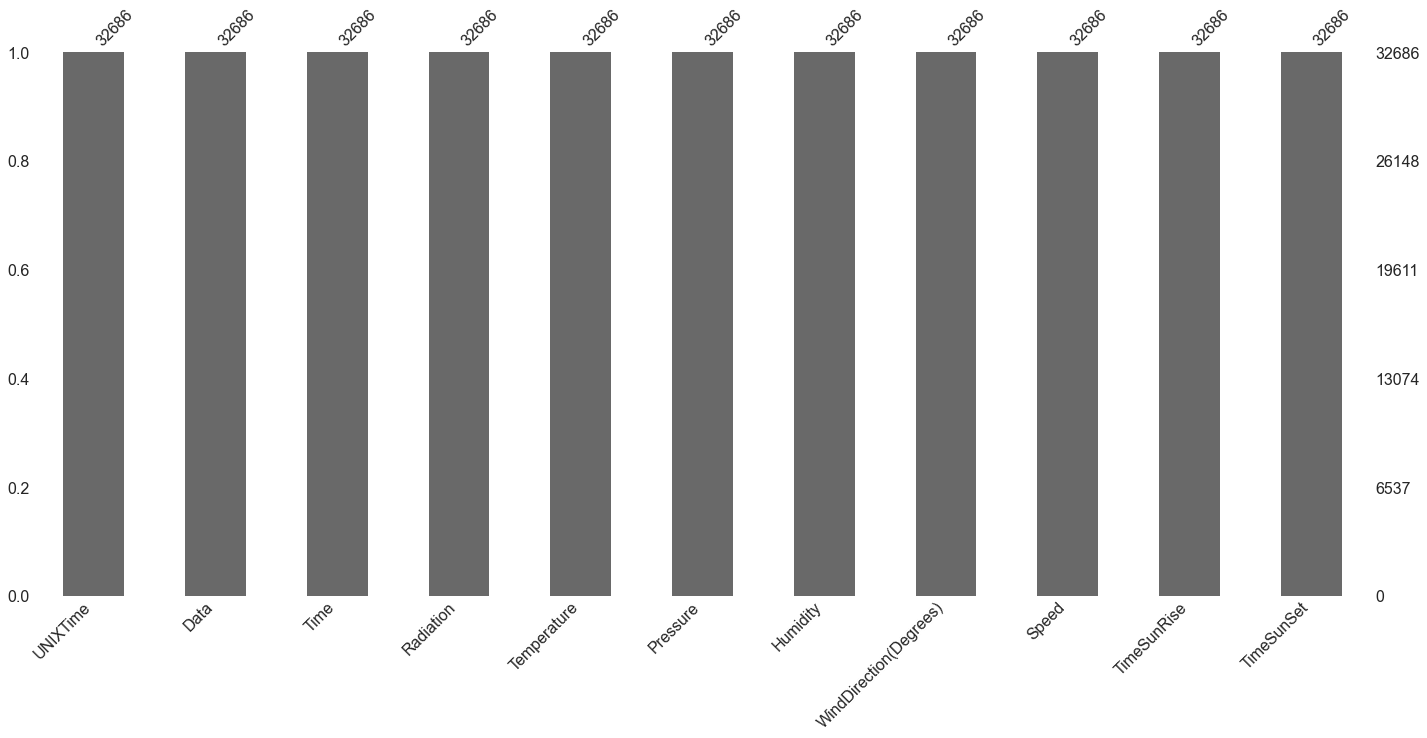

In [669]:
# visualizing data coverage for each feature 
missingno.bar(Dataset)

### Sampling rate
We will investigate the consistency of the data sampling rate:

In [670]:
UX1=np.array(Dataset['UNIXTime'])
sample_rate= np.abs(UX1[:-1]-UX1[1:])
bins = np.array([0, 350, 650, 1000, 10000, 100000, np.inf])
inds = np.digitize(sample_rate, bins)
print(np.bincount(inds))
print(np.max(sample_rate))


[    0 32367   218    42    49     5     4]
5270109


We see that the sampling interval for the most part is approximately 5 minutes, or 300 seconds. From the analysis above we can see that the sampling interval is not completely fixed, with the longest interval between two samples being 224689 seconds, a little over 2 days. This type of missing data is not a big concern for the prediction models we are building here. Although more data is better, the "missing" will not create a bias, or imbalance in the learning process.

In [671]:
# set index to UNIXTIME
Dataset.index =  Dataset['UNIXTime']
Dataset

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
1475229326,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1475229023,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
1475228726,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
1475228421,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
1475228124,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
1480587604,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
1480587301,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
1480587001,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00


In [672]:
# we need to have the day number in the year as the main test idea is based on it.

from datetime import datetime
from pytz import timezone
import pytz
Location= timezone('pacific/Honolulu')
Dataset.index =  pd.to_datetime(Dataset['UNIXTime'], unit='s')
Dataset.index = Dataset.index.tz_localize(pytz.utc).tz_convert(Location)  #  time zone (tz) 

Dataset['Dayinyear'] = Dataset.index.strftime('%j').astype(int)

#Dataset

In [673]:
# set index to UNIXTIME
Dataset.index =  Dataset['UNIXTime']
Dataset

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Dayinyear
UNIXTime,,,,,,,,,,,,
1475229326,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,273
1475229023,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,273
1475228726,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,273
1475228421,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,273
1475228124,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,273
...,...,...,...,...,...,...,...,...,...,...,...,...
1480587604,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,336
1480587301,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,336
1480587001,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,336


In [674]:
#Seperating Time into Hours , Minutes and Second
# used DataFrame.apply to Apply a function along an axis of the DataFrame.
Dataset['Hour'] = Dataset['Time'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int) 
Dataset['Minute'] = Dataset['Time'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
Dataset['Second'] = Dataset['Time'].apply(lambda x: re.search(r'\d+$', x).group(0)).astype(int)
Dataset['SunriseHr'] = Dataset['TimeSunRise'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
Dataset['SunriseMin'] = Dataset['TimeSunRise'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
Dataset['SunsetHr'] = Dataset['TimeSunSet'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
Dataset['SunsetMin'] = Dataset['TimeSunSet'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)

# Dealing with time data
# Extracting Month and Day from Data

#Dataset['Month'] = Dataset['Data'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(np.int)
#Dataset['Day'] = Dataset['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\/)', x).group(0)).astype(np.int)
#Dataset['Year'] =Dataset['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\s)', x).group(0)).astype(np.int)

Dataset = Dataset.drop(['Time','TimeSunRise', 'TimeSunSet'], axis=1) # drop these columns as it is not anymore in use 

In [675]:
# Dealing with time data
# Extracting Month and Day from Data

Dataset['Month'] = Dataset['Data'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
Dataset['Day'] = Dataset['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\/)', x).group(0)).astype(int)
Dataset['Year'] =Dataset['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\s)', x).group(0)).astype(int)

### Feature engineering

#### Sun Index
To take advantage of the daily cycle of the sun, we can generate a "sun index" based on time (of day), sunrise and sunset data. 
During nighttime, between sunset and sunrise, the sun index will be set to zero.
During daytime, between sunrise and sunset, the sun index will return the lowest value of time since sunrise and time until sunset.
The sun index will in this way also carry a property of expecting less radiation when the days get shorter.


In [676]:
time = np.asarray(Dataset['Hour'] + Dataset['Minute']/60)
sunrise = np.asarray(Dataset['SunriseHr'] + Dataset['SunriseMin']/60)
sunset = np.asarray(Dataset['SunsetHr'] + Dataset['SunsetMin']/60)
time_after_rise = time - sunrise
time_to_set = sunset - time
afternoon = np.less(time_to_set,time_after_rise)
night = np.logical_or(time<sunrise,time>sunset)
sun_index = time_after_rise
sun_index[afternoon] = time_to_set[afternoon]
sun_index[night] = 0

Dataset['SunIndex'] = sun_index

In [677]:
#Daniel "we can consider dropping the variables used to formulate sun index"
#Dataset = Dataset.drop(['Second', 'SunriseHr', 'SunriseMin', 'SunsetHr', 'SunsetMin'], axis =1)

In [678]:
#Dataset

In [679]:
print(len(Dataset['Year'].unique()))
print(len(Dataset['SunriseHr'].unique()))

1
1


In [680]:
# Year and SunriseHr only is only represented by same value for the whole dataset
# then it will make no difference in to the ML and so we are droping it
# also data is same as UNIXTime which is better to drop it then the ML model is not biased 

Dataset = Dataset.drop(['Year', 'SunriseHr','Data','UNIXTime'], axis =1)

In [681]:
Dataset

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Dayinyear,Hour,Minute,Second,SunriseMin,SunsetHr,SunsetMin,Month,Day,SunIndex
UNIXTime,,,,,,,,,,,,,,,,
1475229326,1.21,48,30.46,59,177.39,5.62,273,23,55,26,13,18,13,9,29,0.0
1475229023,1.21,48,30.46,58,176.78,3.37,273,23,50,23,13,18,13,9,29,0.0
1475228726,1.23,48,30.46,57,158.75,3.37,273,23,45,26,13,18,13,9,29,0.0
1475228421,1.21,48,30.46,60,137.71,3.37,273,23,40,21,13,18,13,9,29,0.0
1475228124,1.17,48,30.46,62,104.95,5.62,273,23,35,24,13,18,13,9,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480587604,1.22,44,30.43,102,145.42,6.75,336,0,20,4,41,17,42,12,1,0.0
1480587301,1.17,44,30.42,102,117.78,6.75,336,0,15,1,41,17,42,12,1,0.0
1480587001,1.20,44,30.42,102,145.19,9.00,336,0,10,1,41,17,42,12,1,0.0


In [682]:
#Dataset = Dataset.drop(['UNIXTime'], axis =1)

In [683]:
# check how many dayes we have
len(Dataset['Day'].unique())
#Dataset['DayOfYear'].unique()

31

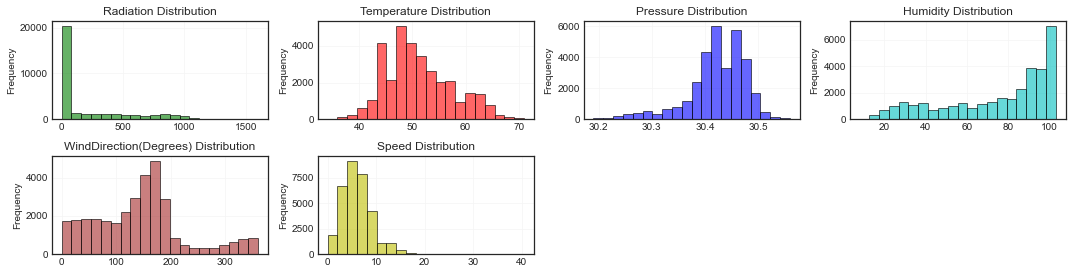

In [684]:
# Visualizing data distribution for physical features
rows = 8
cols = 4
colors = ['g','r','b','c','brown','y','m','grey','purple','orange','silver','g','r','b','c','brown','y','m','grey','purple','orange','silver', 'g','r','b','c','brown','y','m','grey','purple','orange']
fig=plt.figure(figsize=(15,15))

for i, feature in enumerate(Dataset.columns[0:6]):
    ax=fig.add_subplot(rows,cols,i+1)
    Dataset[feature].hist(bins=20,ax=ax,color=colors[i], alpha=0.6, edgecolor='k')
    ax.set_title(feature+" Distribution")
    ax.set_ylabel('Frequency')
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

 <li>We can see that data is not that far from being normal distributed but we still it being skewed.
    This could  be fixed a bit by removing outlier(if existed)

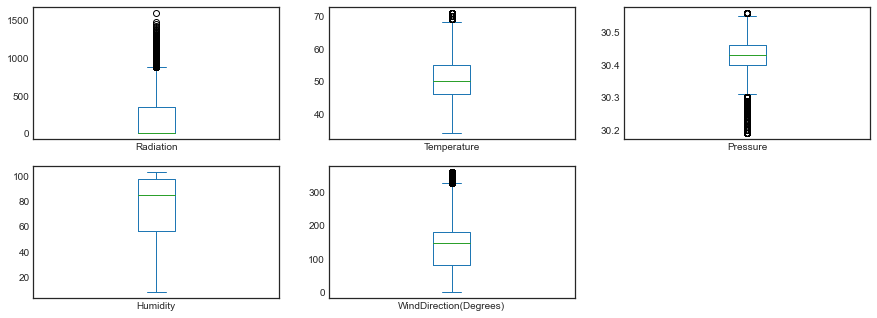

In [685]:
# Visualizing outliers
plt.style.use('seaborn-white')
Dataset_outlier=Dataset[['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)']]
Dataset_outlier.plot(kind="box",subplots=True,layout=(7,3),figsize=(15,20))
plt.show()

In [686]:
# we can see some possible outliesrs in the area above and bellow the box plot area (the circular black points)

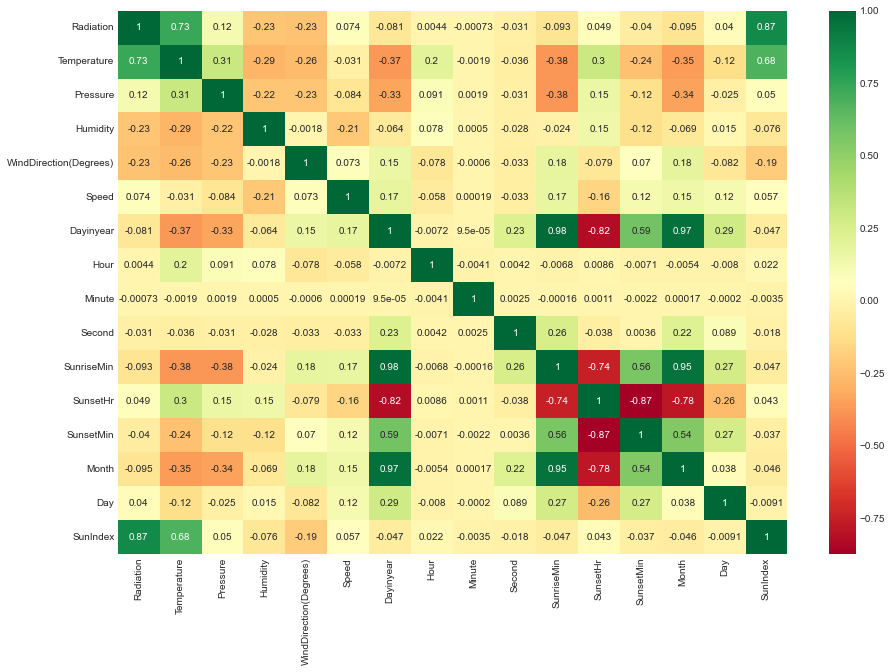

In [687]:
# A correlation matrix was computed to evaluate which features are the most relevant to the models
plt.figure(figsize=(15,10))
sns.heatmap(Dataset.corr(),annot=True,cmap='RdYlGn')
plt.show()

<li> The correlation between the dependent variable (Radiation, label) and the 
independent variables (features) shows that most of the features have correlation (both positive and nigative) with 
the label. However, Speed show no linear correlation to  the label.

### Outlier removal 
###### Local outlier factor

It removes the outlier by measuring the local density deviation of a given data point with respect to the data points near it.

Local density is determined by estimating distances between data points that are neighbors (k-nearest neighbors). So for each data point, local density can be calculated. By comparing these we can check which data points have similar densities and which have a lesser density than its neighbors. The ones with the lesser densities are considered as the outliers.
Firstly, k-distances are distances between points that are calculated for each point to determine their k-nearest neighbors. The 2nd closest point is said to be the 2nd nearest neighbor to the point


###### Once class SVM

A One-class classification method is used to detect the outliers and anomalies in a dataset. Based on Support Vector Machines (SVM) evaluation, the One-class SVM applies a One-class classification method for novelty detection.

This algorithm can be applied to high-dimensional data sets.

### Outlier removal 

In [688]:
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
Dataset_std = Dataset[np.abs(Dataset - Dataset.mean()) <= (3 * Dataset.std())]

#Method 2: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3) #the proportion of outliers in the data set
yhat = lof.fit_predict(Dataset)
mask = yhat != -1
Dataset_lof = Dataset[mask]

# Method 3: One-class SVM
svm = OneClassSVM(nu=0.1) #controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data. default is 0.5
yhat = svm.fit_predict(Dataset)
mask = yhat != -1
Dataset_svm = Dataset[mask]

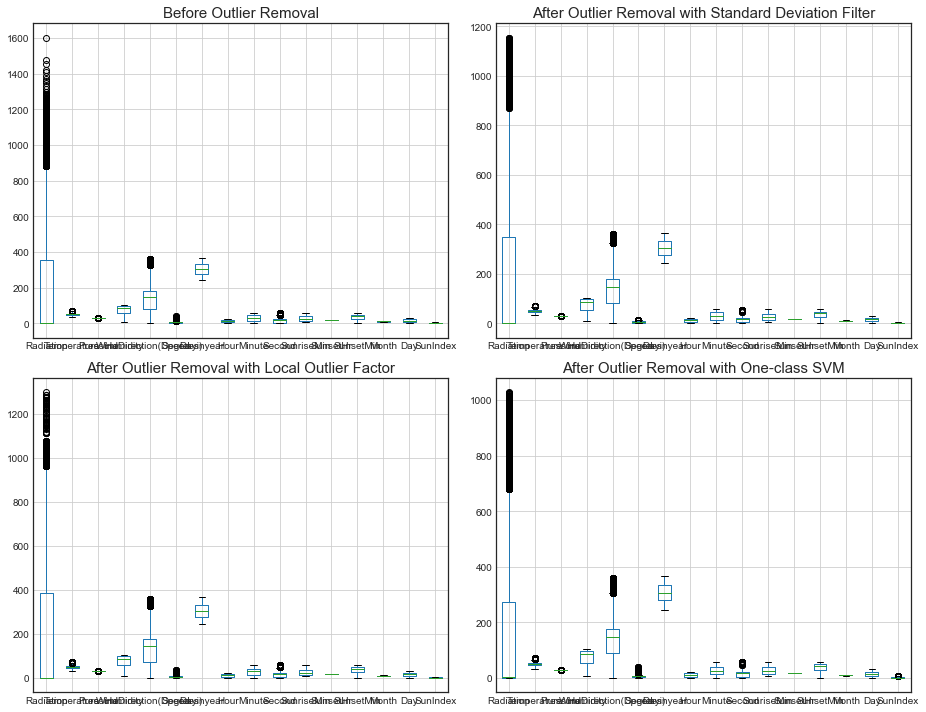

In [689]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
Dataset.boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(2,2,2)
Dataset_std.boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(2,2,3)
Dataset_lof.boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(2,2,4)
Dataset_svm.boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

#### As it is shown in this plot, the SVM method id the most optimal in current case

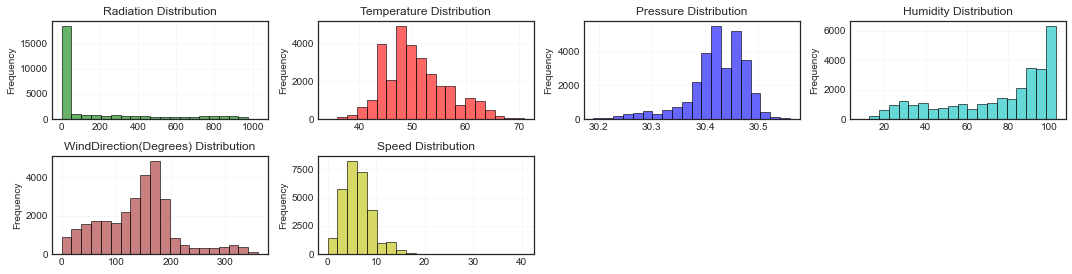

In [690]:
# Data distribution after outliers removal
rows = 8
cols = 4
colors = ['g','r','b','c','brown','y','m','grey','purple','orange','silver','g','r','b','c','brown','y','m','grey','purple','orange','silver', 'g','r','b','c','brown','y','m','grey','purple','orange']
fig=plt.figure(figsize=(15,15))

for i, feature in enumerate(Dataset_svm.columns[0:6]):
    ax=fig.add_subplot(rows,cols,i+1)
    Dataset_svm[feature].hist(bins=20,ax=ax,color=colors[i], alpha=0.6, edgecolor='k')
    ax.set_title(feature+" Distribution")
    ax.set_ylabel('Frequency')
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

General observation here is that the data doesn't have much outliers and so the distribution kept to be almost the same before and after removal process.

Now data is ready to be splited into two different sets. The first set will be used for the training and validation step and the second set will be used to test the model based on a never seen data(blind test)

### Data splitting - training, validation and test set 

In [691]:
Dataset['Dayinyear'].unique()

array([273, 272, 271, 270, 269, 268, 267, 266, 265, 264, 263, 262, 261,
       260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 249, 248,
       247, 246, 245, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296,
       295, 294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283,
       282, 281, 280, 279, 278, 277, 276, 275, 334, 333, 332, 331, 330,
       329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317,
       316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 366, 365,
       364, 363, 362, 361, 360, 359, 358, 357, 356, 355, 354, 353, 352,
       351, 350, 349, 348, 347, 346, 345, 344, 343, 340, 339, 338, 337,
       336], dtype=int64)

In [692]:
Dataset

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Dayinyear,Hour,Minute,Second,SunriseMin,SunsetHr,SunsetMin,Month,Day,SunIndex
UNIXTime,,,,,,,,,,,,,,,,
1475229326,1.21,48,30.46,59,177.39,5.62,273,23,55,26,13,18,13,9,29,0.0
1475229023,1.21,48,30.46,58,176.78,3.37,273,23,50,23,13,18,13,9,29,0.0
1475228726,1.23,48,30.46,57,158.75,3.37,273,23,45,26,13,18,13,9,29,0.0
1475228421,1.21,48,30.46,60,137.71,3.37,273,23,40,21,13,18,13,9,29,0.0
1475228124,1.17,48,30.46,62,104.95,5.62,273,23,35,24,13,18,13,9,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480587604,1.22,44,30.43,102,145.42,6.75,336,0,20,4,41,17,42,12,1,0.0
1480587301,1.17,44,30.42,102,117.78,6.75,336,0,15,1,41,17,42,12,1,0.0
1480587001,1.20,44,30.42,102,145.19,9.00,336,0,10,1,41,17,42,12,1,0.0


In [693]:
blind_data = [259,285,298,324,352]

In [694]:
test_data = Dataset_svm [Dataset_svm ['Dayinyear'].isin(blind_data)]
train_data = Dataset_svm [~Dataset_svm ['Dayinyear'].isin(blind_data)]

In [695]:
#train_data = train_data.iloc[:,3:9]
#train_data.head()

Text(0.5, 1.0, 'Features Correlating with Radiation')

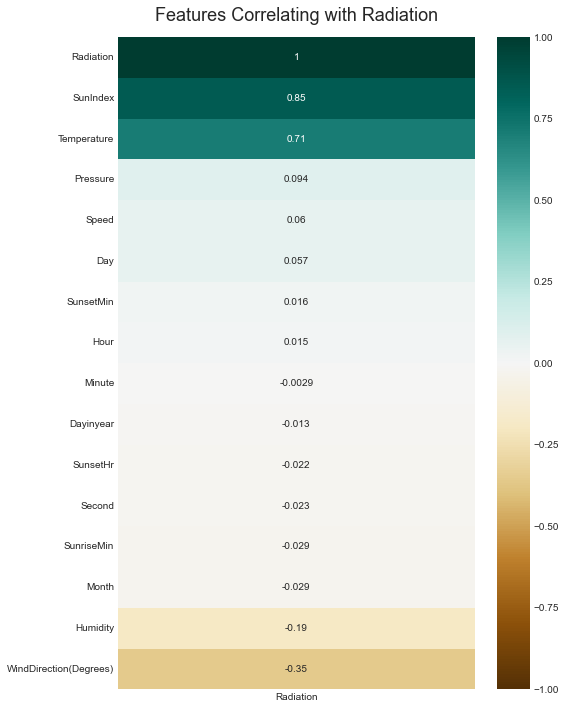

In [696]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_data.corr()[['Radiation']].sort_values(by='Radiation', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Radiation', fontdict={'fontsize':18}, pad=16)

<li> The correlation between the dependent variable (Radiation, label) and the 
independent variables (features) shows that most of the features have show no linear correlation to  the label. However, Temperature and SunIndex show positive linear correlation to  the label.
 
Regadless its correlation property, we will conduct trial and error with different combinations of features to achieve the best result

In [697]:
features = [feat for feat in Dataset_svm.columns]
print(features)

['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Dayinyear', 'Hour', 'Minute', 'Second', 'SunriseMin', 'SunsetHr', 'SunsetMin', 'Month', 'Day', 'SunIndex']


In [698]:
Dataset.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Dayinyear                 0
Hour                      0
Minute                    0
Second                    0
SunriseMin                0
SunsetHr                  0
SunsetMin                 0
Month                     0
Day                       0
SunIndex                  0
dtype: int64

In [699]:
# Drop null values as it is not much and not expected to affect data density
#Dataset.dropna(inplace=True)

In [700]:
train_data.to_excel('training_data.xlsx')

In [701]:
test_data.to_excel('test_data.xlsx')

In [702]:
 #from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data)
scaled_data = pd.DataFrame(scaled_data, columns=features)

In [1]:
scaled_data.head()

NameError: name 'scaled_data' is not defined

In [703]:
training_data = pd.read_excel('training_data.xlsx')
training_data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Dayinyear,Hour,Minute,Second,SunriseMin,SunsetHr,SunsetMin,Month,Day,SunIndex
0,1475229326,1.21,48,30.46,59,177.39,5.62,273,23,55,26,13,18,13,9,29,0.0
1,1475229023,1.21,48,30.46,58,176.78,3.37,273,23,50,23,13,18,13,9,29,0.0
2,1475228726,1.23,48,30.46,57,158.75,3.37,273,23,45,26,13,18,13,9,29,0.0
3,1475228421,1.21,48,30.46,60,137.71,3.37,273,23,40,21,13,18,13,9,29,0.0
4,1475228124,1.17,48,30.46,62,104.95,5.62,273,23,35,24,13,18,13,9,29,0.0


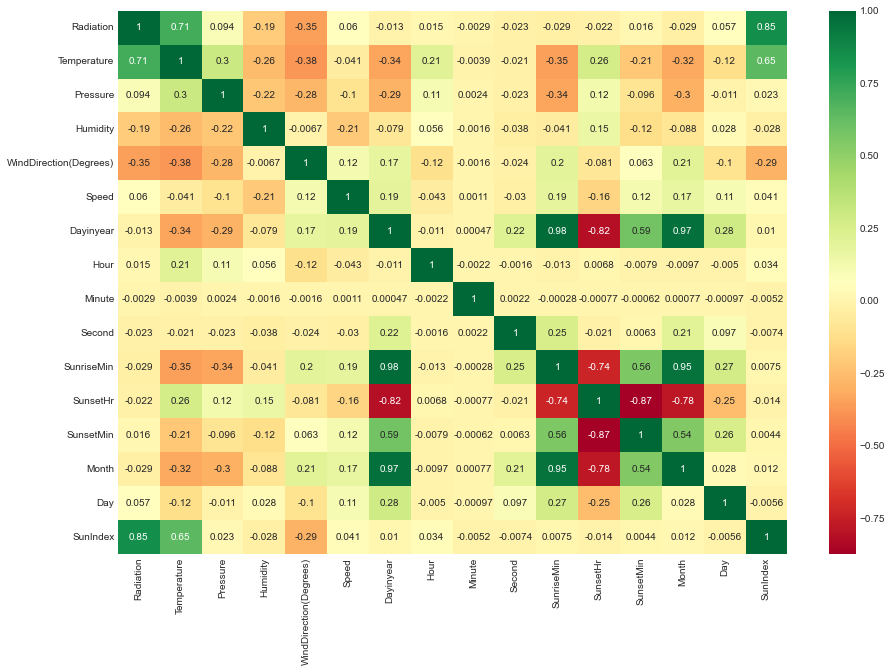

In [704]:
# A correlation matrix was computed to evaluate which features are the most relevant to the models
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

First model built is the base_line model while prediction was done by comparing test data points to corresponding datapoint 24 hrs previously. This analysis was done manually in Excel, attached in Baseline_prediction.xls. Due to the inconsistent sampling rate it was difficult to implement this automatically in python.

Also, The Linear regression model could be considered to be the base line as it is following the most basic concept for prediction which is having the best fit line.

In [705]:
# Splittting the data into train (80% of the data) and validation(20% of the data) parts and choosing the
# the values to be predicted
 

train , test = train_test_split(training_data, test_size = 0.2)

x_train = train.drop(['Radiation', 'UNIXTime', 'SunIndex'], axis=1)
y_train = train['Radiation']

 
x_test = test.drop(['Radiation', 'UNIXTime', 'SunIndex'], axis = 1)
y_test = test['Radiation']




Scaling data


Since many of our algorithm are based on point-to-point distance, it is essential to scale the data as a higher variance in one dimension might lead to worse performance of the model. We are just going to use the MinMaxScaler algorithm within sklearn. 

Scaling the data means it helps to Normalize the data within a particular range.

When MinMaxScaler is used the it is also known as Normalization and it transform all the values in range between (0 to 1) formula is x = [(value - min)/(Max- Min)]

StandardScaler comes under Standardization and its value ranges between (-3 to +3) formula is z = [(x - x.mean)/Std_deviation]

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

MinMax Scaler shrinks the data within the given range, 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

- The fit(data) method is used to compute the mean and std dev for a given feature so that it can be used further for scaling.

- The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.

- The fit_transform() method does both fit and transform.

In [706]:
scaler = MinMaxScaler()
x_train_scaled= scaler.fit_transform(x_train)

#model = SVC()
#model.fit(x_train_scaled, y_train)

x_test_scaled = scaler.transform(x_test)
#y_pred = model.predict(x_test_scaled)

In [707]:
Dataset

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Dayinyear,Hour,Minute,Second,SunriseMin,SunsetHr,SunsetMin,Month,Day,SunIndex
UNIXTime,,,,,,,,,,,,,,,,
1475229326,1.21,48,30.46,59,177.39,5.62,273,23,55,26,13,18,13,9,29,0.0
1475229023,1.21,48,30.46,58,176.78,3.37,273,23,50,23,13,18,13,9,29,0.0
1475228726,1.23,48,30.46,57,158.75,3.37,273,23,45,26,13,18,13,9,29,0.0
1475228421,1.21,48,30.46,60,137.71,3.37,273,23,40,21,13,18,13,9,29,0.0
1475228124,1.17,48,30.46,62,104.95,5.62,273,23,35,24,13,18,13,9,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480587604,1.22,44,30.43,102,145.42,6.75,336,0,20,4,41,17,42,12,1,0.0
1480587301,1.17,44,30.42,102,117.78,6.75,336,0,15,1,41,17,42,12,1,0.0
1480587001,1.20,44,30.42,102,145.19,9.00,336,0,10,1,41,17,42,12,1,0.0


In [708]:
### Performing linear rgression

In [709]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train_scaled,y_train)   
LR_y_pred=LR.predict(x_test_scaled)

In [710]:
LR_predictions = LR.predict(x_test_scaled)

In [711]:
LR_MSE=mean_squared_error(LR_predictions,y_test)
LR_RMSE=np.sqrt(LR_MSE)
LR_RMSE

170.27009164306375

In [712]:
### Performing K-nearest Niegbore 

In [713]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train_scaled,y_train)   
KNN_y_pred=KNN.predict(x_test_scaled)

In [714]:
KNN_predictions = KNN.predict(x_test_scaled)

In [715]:
KNN_MSE=mean_squared_error(KNN_predictions,y_test)
KNN_RMSE=np.sqrt(KNN_MSE)
KNN_RMSE

105.45181612798534

In [716]:
### Performing RandomForest (RF)

In [717]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(max_depth= 15, min_samples_leaf=46)
RF.fit(x_train_scaled,y_train)   
RF_y_pred=RF.predict(x_test_scaled)

In [718]:
RF_mse=mean_squared_error(RF_y_pred,y_test)
rmse=np.sqrt(RF_mse)
print (rmse)

84.91427606839414


### Performing XGBoost

In [719]:
import xgboost as xgb
XGB = xgb.sklearn.XGBRegressor(random_state=42)
XGB.fit(x_train_scaled,y_train, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(x_train_scaled,y_train)]) 

[0]	validation_0-rmse:244.48003
[1]	validation_0-rmse:184.91339
[2]	validation_0-rmse:144.41139
[3]	validation_0-rmse:117.34785
[4]	validation_0-rmse:100.19540
[5]	validation_0-rmse:89.55595
[6]	validation_0-rmse:82.93459
[7]	validation_0-rmse:78.52190
[8]	validation_0-rmse:75.70517
[9]	validation_0-rmse:73.15227
[10]	validation_0-rmse:71.20251
[11]	validation_0-rmse:69.47987
[12]	validation_0-rmse:68.46585
[13]	validation_0-rmse:66.94237
[14]	validation_0-rmse:66.16788
[15]	validation_0-rmse:64.83784
[16]	validation_0-rmse:63.86608
[17]	validation_0-rmse:63.42118
[18]	validation_0-rmse:62.77903
[19]	validation_0-rmse:62.20438
[20]	validation_0-rmse:61.48526
[21]	validation_0-rmse:61.10129
[22]	validation_0-rmse:60.48163
[23]	validation_0-rmse:60.00790
[24]	validation_0-rmse:59.30310
[25]	validation_0-rmse:58.79947
[26]	validation_0-rmse:58.43215
[27]	validation_0-rmse:58.18505
[28]	validation_0-rmse:57.76416
[29]	validation_0-rmse:57.45598
[30]	validation_0-rmse:57.30110
[31]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [720]:
predictions = XGB.predict(x_test_scaled)

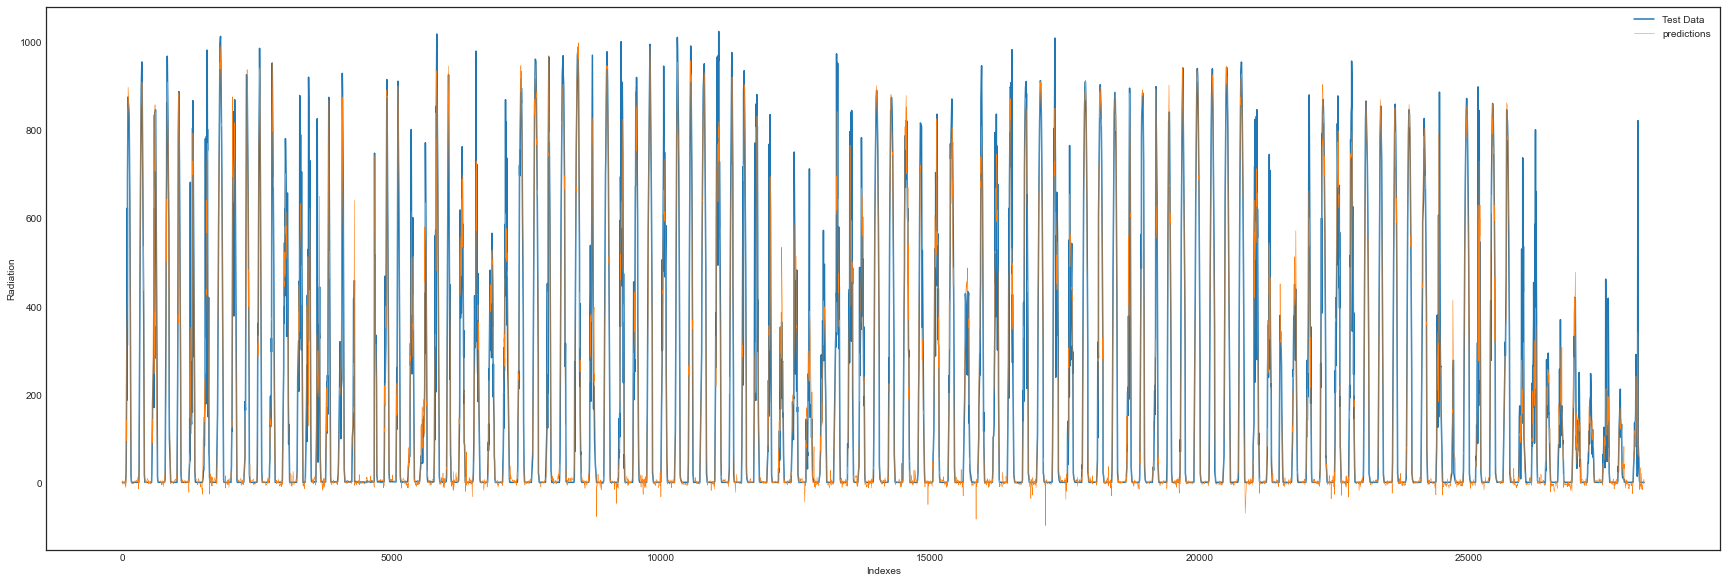

In [721]:
%matplotlib inline
from sklearn.metrics import mean_squared_error   
# Adding the Test data and predictions into a dataframe
results = pd.DataFrame()
results['Test Data']=y_test


#print(y_test.shape)
results['predictions']=predictions



#Sorting them by based on the keys from the test data
results = results.sort_index()
results

mse=mean_squared_error(predictions,y_test)
rmse_XGB=np.sqrt(mse)
rmse_XGB


plt.figure(figsize=(30,10))
plt.plot(results['Test Data'])
plt.plot(results['predictions'],linewidth=0.5)


#plt.title('Rmse values')
plt.xlabel('Indexes')
plt.ylabel('Radiation')
plt.legend(['Test Data','predictions'])
#%matplotlib inline
#plt.show()







In [722]:
mse=mean_squared_error(predictions,y_test)
rmse_XGB=np.sqrt(mse)
rmse_XGB

70.03896625621086

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


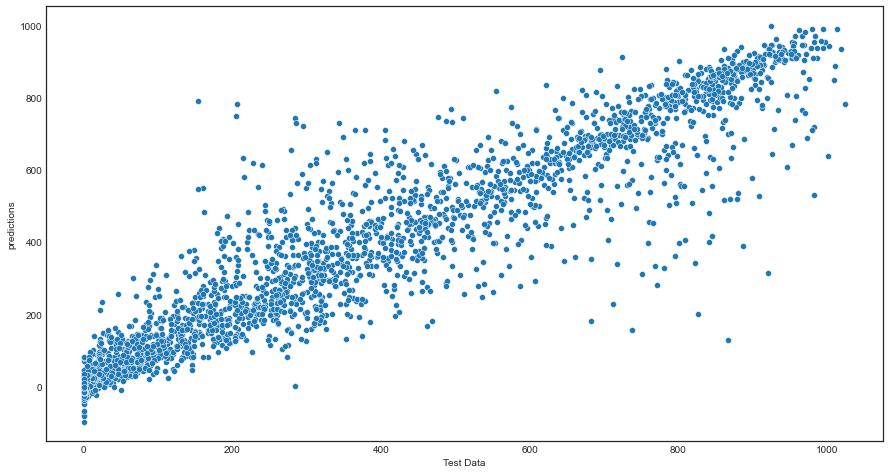

In [723]:
fig, scatter = plt.subplots(figsize = (15,8))
scatter = sns.scatterplot(x = 'Test Data', y ='predictions', data=results)

 

scatter.legend(loc='upper right', fontsize = 7);

In [724]:
# Adding the Test data and predictions into a dataframe
results = pd.DataFrame()
results['Test Data']=y_test

#print(y_test.shape)
results['predictions']=predictions
results['Day']=test['Day']

#Sorting them by based on the keys from the test data
results = results.sort_index()
results

,Test Data,predictions,Day
1,1.21,5.349941,29
3,1.21,2.891444,29
5,1.21,1.565539,29
8,1.23,-2.865492,29
20,1.20,0.575243,29
...,...,...,...
28231,1.22,-15.087972,1
28232,1.19,-15.898790,1
28236,1.18,-3.208961,1
28255,1.19,8.585238,1


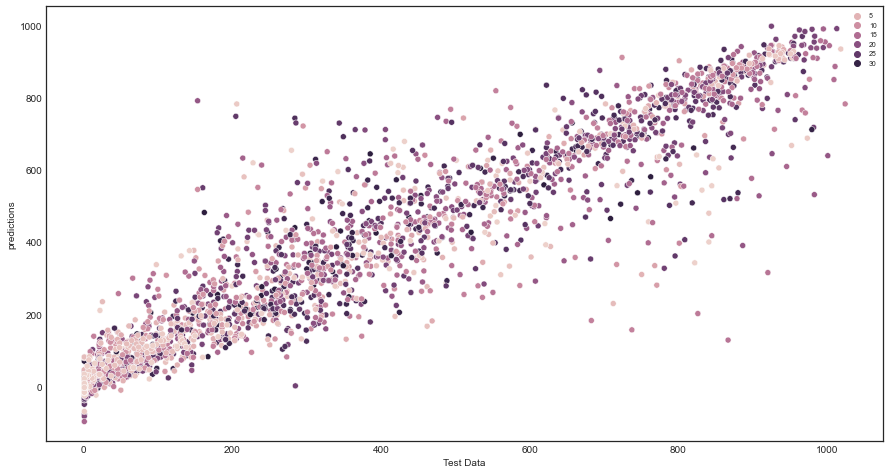

In [725]:
fig, scatter = plt.subplots(figsize = (15,8))
scatter = sns.scatterplot(x = 'Test Data', y ='predictions', data=results, hue='Day', )

scatter.legend(loc='upper right', fontsize = 7);

# Models Evaluation

In [726]:
# error based on R2

from sklearn.metrics import r2_score

r2RF=r2_score(RF_y_pred,y_test)
r2XGB=r2_score(predictions,y_test)
r2KNN=r2_score(KNN_predictions,y_test)
r2LR=r2_score(LR_predictions,y_test)

print("R2 of Linear regression:",r2LR)
print("R2 of KNN:",r2KNN)
print("R2 of Random forest:", r2RF)
print("R2 of XGboost:",r2XGB)

R2 of Linear regression: 0.3856064588368703
R2 of KNN: 0.8462497782374696
R2 of Random forest: 0.8925406963692203
R2 of XGboost: 0.9323695289582132


Baseline prediction was done by comparing test data points to corresponding datapoint 24 hrs previously. This analysis was done manually in Excel, attached in Baseline_prediction.xls. Due to the inconsistent sampling rate it was difficult to implement this automatically in python.

In [727]:
# error based on RMSE

LR_MSE=mean_squared_error(LR_predictions,y_test)
KNN_MSE=mean_squared_error(KNN_predictions,y_test)
RF_mse=mean_squared_error(RF_y_pred,y_test)
XGboostmse=mean_squared_error(predictions,y_test)

LR_RMSE=np.sqrt(LR_MSE)
KNN_RMSE=np.sqrt(KNN_MSE)
RF_rmse=np.sqrt(RF_mse)
XGB_rmse=np.sqrt(mse)

BL_RMSE = 173.4

print("RMSE of Baseline Model:",BL_RMSE)
print("RMSE of Linear regression:",LR_RMSE)
print("RMSE of KNN:",KNN_RMSE)
print("RMSE of Random forest:",RF_rmse)
print("RMSE of XGboost:",XGB_rmse)



RMSE of Baseline Model: 173.4
RMSE of Linear regression: 170.27009164306375
RMSE of KNN: 105.45181612798534
RMSE of Random forest: 84.91427606839414
RMSE of XGboost: 70.03896625621086


As seen XGboost and Random forest algorithms are the highest with near error score. We decided to conduct the hyperparameter tunning and the blind test using XGboost as it has the lowest error and cosidered as a highly scalable algorithm.

In [728]:
#from sklearn.metrics import explained_variance_score
#print(explained_variance_score(y_test, RF_y_pred))
#print(explained_variance_score(y_test, predictions))

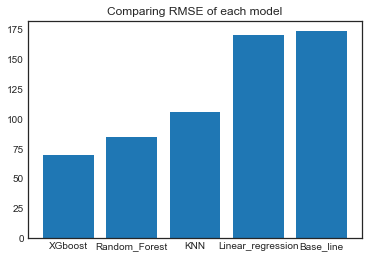

In [729]:
# Models comparison
Prediction_RMSE = [rmse_XGB,rmse, KNN_RMSE, LR_RMSE,BL_RMSE ]
Algorithms = ['XGboost','Random_Forest','KNN','Linear_regression','Base_line']
Error = np.arange(len(Algorithms))
plt.bar(Error, Prediction_RMSE)
plt.xticks(Error, Algorithms)
plt.title('Comparing RMSE of each model')
plt.show()

## Permutation features importance

The permutation features importance model inspection technique, was applied to show the 
relationship between the features and the predictions. The features importance shows that Hours, Temerature, Humidity and Day and Dayinyear have the highest importance, while others have the lowest importance. 



Text(0.5, 0, 'Permutation Importance')

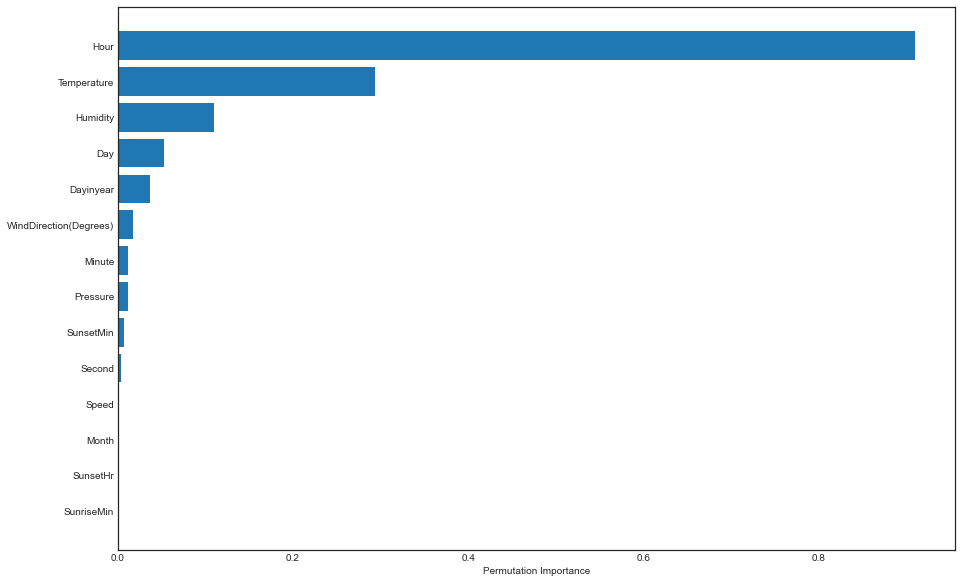

In [730]:
perm_importance = permutation_importance(XGB, x_test_scaled, y_test)
plt.figure(figsize=(15,10))

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Based on this, Speed, Month, SunsetHour,and SunsetMin can be 
removed from the training set without having a significant impact on the model. This could be 
done in the event of a lack of computational power, memory, or time constraints, but it was not 
necessary in the current study.

In [731]:
#def correlation_heatmap(train):
#    correlations = train.corr()

 #   fig, ax = plt.subplots(figsize=(10,10))
  #  sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
   #             square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
     #           )
    #plt.show();
    
#correlation_heatmap(x_train[x_train.columns[sorted_idx]])

## Hyperparameters tunning

### Using XGBoost’s CV

In [732]:
## Hyper parameters optimization
parameters = {'learning_rate': [0.2, 0.1, 0.01],
              'max_depth': [3, 5, 10],
              'min_child_weight': [3,4],
              'subsample': [0.9, 0.8],
              'colsample_bytree': [0.9, 0.8],
              'n_estimators':[300, 500, 1000] }

There are three common ways to do the tunning including Manual Search, Grid Search and Randomized Search

we prefered using the Manual search in our case as the others are more time and computitional consuming.

In [733]:
# Hyperparameters optimization using GridSearchCV (time consumming so will go for the random tunning)
#from sklearn.model_selection import GridSearchCV
#optimal_params= GridSearchCV (XGB,parameters ,cv = 5,n_jobs = 3,verbose=True)

#optimal_params.fit(x_train,y_train,early_stopping_rounds=10, eval_metric='rmse',eval_set=[(x_train, y_train)]) 

#print (optimal_params.best_score_)
#print (optimal_params.best_params_)

In [734]:
# Manual Hyperparameters tunning

import xgboost as xgb
XGB_tunning = xgb.sklearn.XGBRegressor(n_estimators= 500, colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 6, min_child_weight= 5, subsample= 0.8)
XGB_tunning.fit(x_train,y_train, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(x_train,y_train)]) 

[0]	validation_0-rmse:301.72806
[1]	validation_0-rmse:275.55490
[2]	validation_0-rmse:251.83948
[3]	validation_0-rmse:232.77380
[4]	validation_0-rmse:216.17053
[5]	validation_0-rmse:201.54527
[6]	validation_0-rmse:186.14133
[7]	validation_0-rmse:172.54863


c:\Users\danfy\anaconda3\envs\MOD510\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-rmse:160.39404
[9]	validation_0-rmse:149.90573
[10]	validation_0-rmse:140.44333
[11]	validation_0-rmse:131.83702
[12]	validation_0-rmse:124.76618
[13]	validation_0-rmse:118.29115
[14]	validation_0-rmse:115.66001
[15]	validation_0-rmse:110.48556
[16]	validation_0-rmse:105.70079
[17]	validation_0-rmse:102.05703
[18]	validation_0-rmse:97.91897
[19]	validation_0-rmse:95.00326
[20]	validation_0-rmse:92.04998
[21]	validation_0-rmse:89.19951
[22]	validation_0-rmse:86.73293
[23]	validation_0-rmse:84.86261
[24]	validation_0-rmse:83.45784
[25]	validation_0-rmse:82.45779
[26]	validation_0-rmse:80.92021
[27]	validation_0-rmse:79.59804
[28]	validation_0-rmse:79.11952
[29]	validation_0-rmse:77.94944
[30]	validation_0-rmse:77.02470
[31]	validation_0-rmse:76.09686
[32]	validation_0-rmse:75.23181
[33]	validation_0-rmse:74.71859
[34]	validation_0-rmse:74.01720
[35]	validation_0-rmse:73.49844
[36]	validation_0-rmse:73.10045
[37]	validation_0-rmse:72.68795
[38]	validation_0-rmse:72.10521


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [735]:
predictions_tunned = XGB_tunning.predict(x_test)

In [736]:
tunned_mse=mean_squared_error(predictions_tunned,y_test)
rmse_tunned=np.sqrt(tunned_mse)
rmse_tunned

68.25571745822005

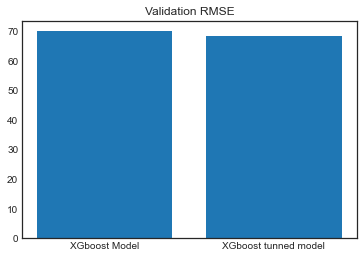

In [737]:
Prediction_RMSE = [XGB_rmse,rmse_tunned]
Algorithms = ['XGboost Model','XGboost tunned model']
Error = np.arange(len(Algorithms))
plt.bar(Algorithms, Prediction_RMSE)
plt.xticks(Error, Algorithms)
plt.title('Validation RMSE')
plt.show()

As seen in the plot, the hyperparameter tunning decreased the error a little bit and more can be done with the tunning to decrease it even more but we are a bit carfull here as we don't want to push it to learn more (learning rate) for example then it is overfttting.

## Blind Predictions / Test

In [738]:
blind_data

[259, 285, 298, 324, 352]

In [739]:
print (training_data.columns)
print (test_data.columns)

Index(['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Dayinyear', 'Hour', 'Minute',
       'Second', 'SunriseMin', 'SunsetHr', 'SunsetMin', 'Month', 'Day',
       'SunIndex'],
      dtype='object')
Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Dayinyear', 'Hour', 'Minute',
       'Second', 'SunriseMin', 'SunsetHr', 'SunsetMin', 'Month', 'Day',
       'SunIndex'],
      dtype='object')


In [740]:
# choose desired columns

blind_COLUMNS=test_data[[ 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Dayinyear', 'Hour', 'Minute',
       'Second', 'SunriseMin', 'SunsetHr', 'SunsetMin', 'Month', 'Day']]
df = blind_COLUMNS [[
    'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Dayinyear', 'Hour', 'Minute',
       'Second', 'SunriseMin', 'SunsetHr', 'SunsetMin', 'Month', 'Day']]

In [741]:
# Apply prediction

prediction = XGB_tunning.predict(df)
blind_COLUMNS  ['blind'] = prediction

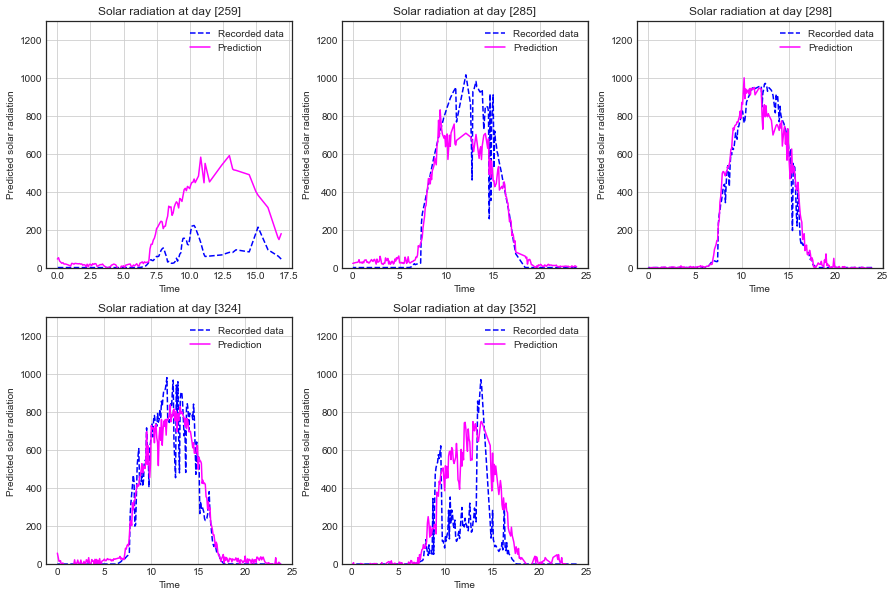

In [742]:
plt.figure(figsize=(15,10))
for i in range(5):
    desired_prediction= [blind_data[i]]
    N=i+1
    desired_day1 = blind_COLUMNS.loc[blind_COLUMNS['Dayinyear'].isin(desired_prediction)]
    plt.subplot(2,3,N)
    plt.plot(desired_day1 ['Hour'] + desired_day1 ['Minute']/60,desired_day1 ['Radiation'],'--',c='blue', label='Recorded data')
    plt.plot(desired_day1 ['Hour'] + desired_day1 ['Minute']/60,desired_day1 ['blind'],'-',c='magenta', label='Prediction')
    plt.grid()
    plt.title(f'Solar radiation at day {desired_prediction}')
    plt.xlabel("Time")
    plt.ylabel("Predicted solar radiation")
    plt.ylim(0,1300)
    plt.legend()

### Day 259
Two things stand out with this comparison:
1. Solar radiation sensor reading is very low.
2. Data sampling stops around 17:00.
As most days will be sunny in this dataset, it is understandable that the prediction will be off when there is no sun.
On this specific day, it looks like there might have been a complete cloud coverage.
We may also speculate that something was off with the readings, since following these readings the weather sampling was taken offline untill the next day, possibly due to maintenance. 

### Days 285, 298, and 324
These days look like sunny days and the predictions fit quite well.

### Day 352
Here the data can be interpreted as showing a partly cloudy day, as we can see alternating durations of high and low radiation. Similar to day 259 it seems like our model will not predict radiations much less than 600in the middle of the day, no matter the input. This makes sense 

## Applying Sun Index
Here we we will add SunIndex column to training data set to see if it can provide more accurate prediction for a full day. Following same steps as previously.

In [743]:
x_train = train.drop(['Radiation','UNIXTime'], axis=1)
y_train = train['Radiation']
XGB_tunning = xgb.sklearn.XGBRegressor(random_state=42)
XGB_tunning.fit(x_train,y_train, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(x_train,y_train)]) 

[0]	validation_0-rmse:240.52004
[1]	validation_0-rmse:179.36412
[2]	validation_0-rmse:138.41595
[3]	validation_0-rmse:111.49285
[4]	validation_0-rmse:94.38316
[5]	validation_0-rmse:83.56910
[6]	validation_0-rmse:77.06143
[7]	validation_0-rmse:72.11833


c:\Users\danfy\anaconda3\envs\MOD510\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-rmse:69.56461
[9]	validation_0-rmse:66.73766
[10]	validation_0-rmse:65.13055
[11]	validation_0-rmse:63.57138
[12]	validation_0-rmse:61.74403
[13]	validation_0-rmse:60.68656
[14]	validation_0-rmse:59.80608
[15]	validation_0-rmse:59.23819
[16]	validation_0-rmse:58.51790
[17]	validation_0-rmse:57.85121
[18]	validation_0-rmse:57.19537
[19]	validation_0-rmse:56.68611
[20]	validation_0-rmse:56.37941
[21]	validation_0-rmse:55.85349
[22]	validation_0-rmse:55.47083
[23]	validation_0-rmse:54.99004
[24]	validation_0-rmse:54.45750
[25]	validation_0-rmse:54.11522
[26]	validation_0-rmse:53.41649
[27]	validation_0-rmse:53.18993
[28]	validation_0-rmse:52.83850
[29]	validation_0-rmse:52.62046
[30]	validation_0-rmse:52.34837
[31]	validation_0-rmse:51.71107
[32]	validation_0-rmse:51.20889
[33]	validation_0-rmse:50.87790
[34]	validation_0-rmse:50.62561
[35]	validation_0-rmse:50.53943
[36]	validation_0-rmse:50.50133
[37]	validation_0-rmse:50.20019
[38]	validation_0-rmse:50.02640
[39]	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [744]:
# choose desired columns

blind_COLUMNS=test_data[[ 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Dayinyear', 'Hour', 'Minute',
       'Second', 'SunriseMin', 'SunsetHr', 'SunsetMin', 'Month', 'Day', 'SunIndex']]
df = blind_COLUMNS [[
    'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Dayinyear', 'Hour', 'Minute',
       'Second', 'SunriseMin', 'SunsetHr', 'SunsetMin', 'Month', 'Day', 'SunIndex']]

In [745]:
# Apply prediction

prediction = XGB_tunning.predict(df)
blind_COLUMNS  ['blind'] = prediction

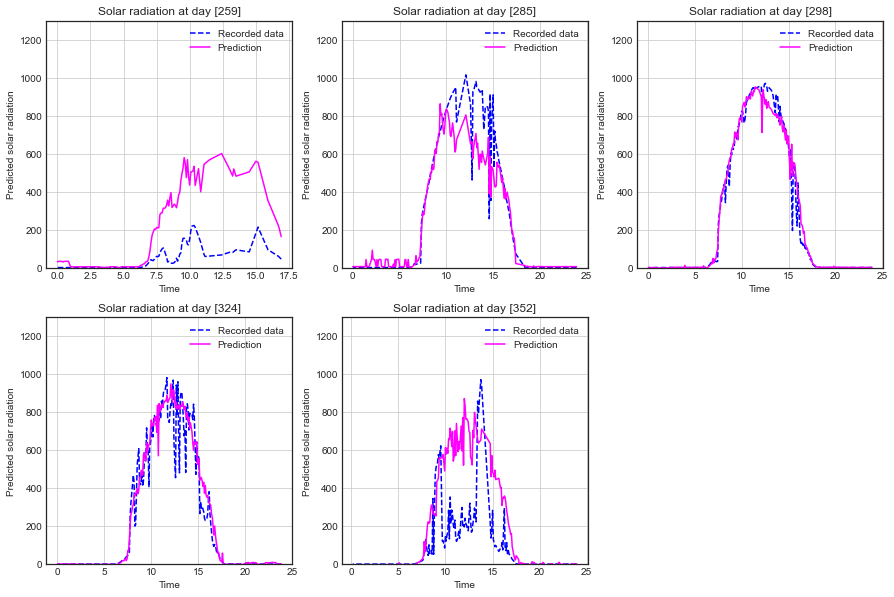

In [746]:
plt.figure(figsize=(15,10))
for i in range(5):
    desired_prediction= [blind_data[i]]
    N=i+1
    desired_day = blind_COLUMNS.loc[blind_COLUMNS['Dayinyear'].isin(desired_prediction)]
    plt.subplot(2,3,N)
    plt.plot(desired_day ['Hour'] + desired_day ['Minute']/60,desired_day ['Radiation'],'--',c='blue', label='Recorded data')
    plt.plot(desired_day ['Hour'] + desired_day ['Minute']/60,desired_day ['blind'],'-',c='magenta', label='Prediction')
    plt.grid()
    plt.title(f'Solar radiation at day {desired_prediction}')
    plt.xlabel("Time")
    plt.ylabel("Predicted solar radiation")
    plt.ylim(0,1300)
    plt.legend()

By comparing prediction made with and without the engineered feature - SunIndex - we can see that it has a positive effect on accuracy of model.

## Conclusion
By following the standard steps for building a machine learning model, starting from explorative data analysis and pre-processing (data cleaning), through feature engineering, and ending by using different algorithms, we can see that all steps have a significant impact on the quality of the final model. We deminstrated that hyperparameter tuning can reduce prediction error, although the effect seen was small.

We have seen how different ML-models work and which are more suited for a dataset similar to what we had.

## Further work

1. Baseline model could be implemented into python, result would not change, but it would be easier to rerun for other test data sets.
2. Dataset could be preprocessed to aggregate into hours to reduce volatility. Instead of 12 datapoints per variable per hour (1 measurement per 5 min) we could have min, max and mean for each variable per hour instead. Since the sampling rate was not constant some form of weighted average could be considered. Inspiration gathered from an online article (2) where a much bigger dataset was used and aggregated into days.



## References

[1] https://www.weather.gov/hfo/climate_summary </br>
[2] https://www.frontiersin.org/articles/10.3389/feart.2021.596860/full </br>
[3] https://www.weather.gov/hfo/climate_summary</br>
[4] https://scikit-learn.org/stable/modules/permutation_importance.html</br>
[5]https://scikit-learn.org/stable/supervised_learning.html